# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Galang Rakha Ahnanta
- **Email:** galangrakha2@gmail.com
- **ID Dicoding:** galang_rakha

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Apakah ada perbedaan signifikan dalam pola peminjaman sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("Dataset/day.csv")
df_hour = pd.read_csv("Dataset/hour.csv")

In [3]:
print(df_day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
print(df_hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Data terdiri dari dua dataset: harian (df_day) dan per jam (df_hour)
- Dataset harian memiliki informasi agregat untuk setiap hari
- Dataset per jam memberikan informasi lebih rinci tentang peminjaman sepeda setiap jam

### Assessing Data

In [5]:
print('Dataframe day:')
print(df_day.isna().sum())

print('\nDataframe hour:')
print(df_hour.isna().sum())

print('Dataframe day:', df_day.duplicated().sum())
print('Dataframe hour:', df_hour.duplicated().sum())

print(df_day.describe())
print(df_hour.describe())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Dataframe day: 0
Dataframe hour: 0
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000  

**Insight:**
- Tidak ada nilai yang hilang (missing values) dalam kedua dataset
- Tidak ada duplikasi data dalam kedua dataset
- Dataset harian mencakup 731 hari (2 tahun)
- Dataset per jam memiliki 17,379 entri (731 hari x 24 jam)

### Cleaning Data

In [6]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


**Insight:**
- Kolom 'dteday' diubah menjadi tipe data datetime untuk memudahkan analisis temporal
- Tidak diperlukan pembersihan data lebih lanjut karena data sudah cukup bersih

## Exploratory Data Analysis (EDA)

### Explore Distribusi Variabel

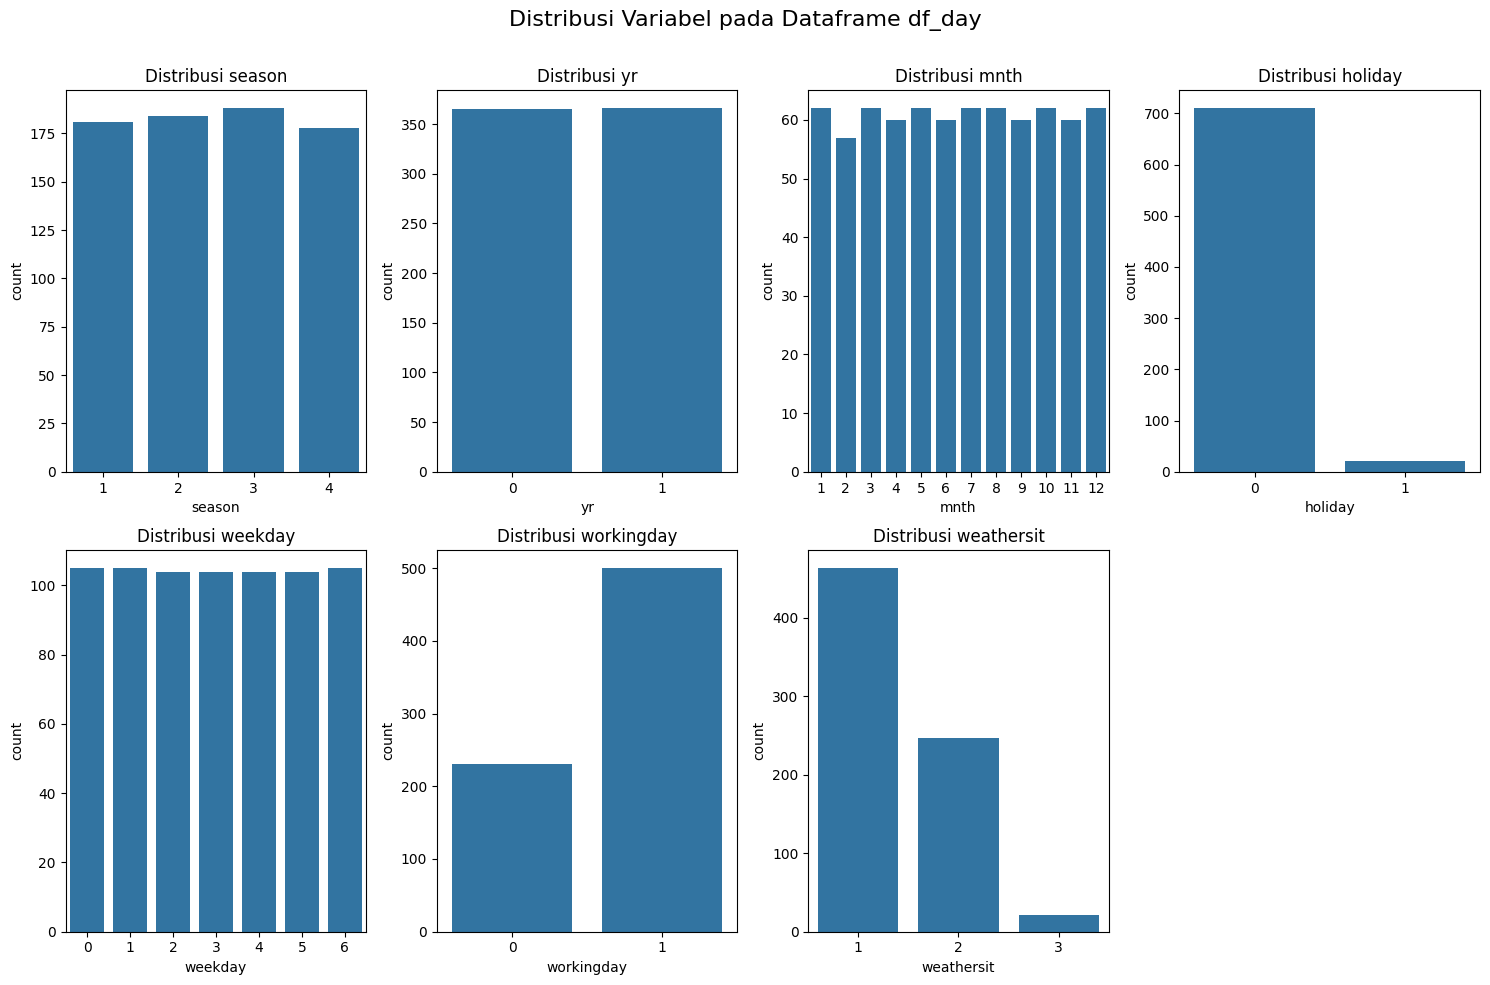

In [7]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribusi Variabel pada Dataframe df_day', fontsize=16)

for i, column in enumerate(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']):
    plt.subplot(2, 4, i+1)
    sns.countplot(data=df_day, x=column)
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Heatmap Korelasi Antar Variabel di df_day

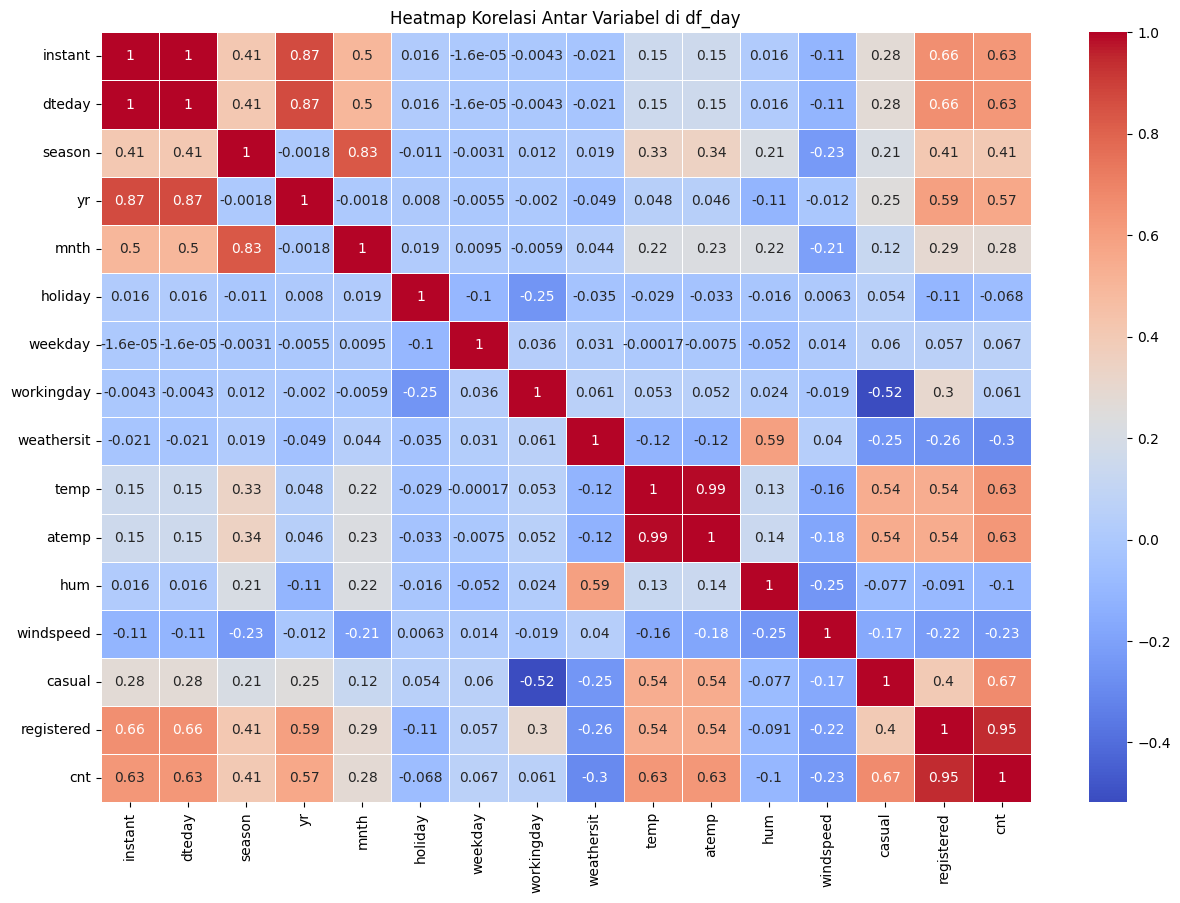

In [8]:
corr_day = df_day.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_day, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel di df_day')
plt.show()

Hubungan antara Kelembaban dan Jumlah Peminjaman Sepeda

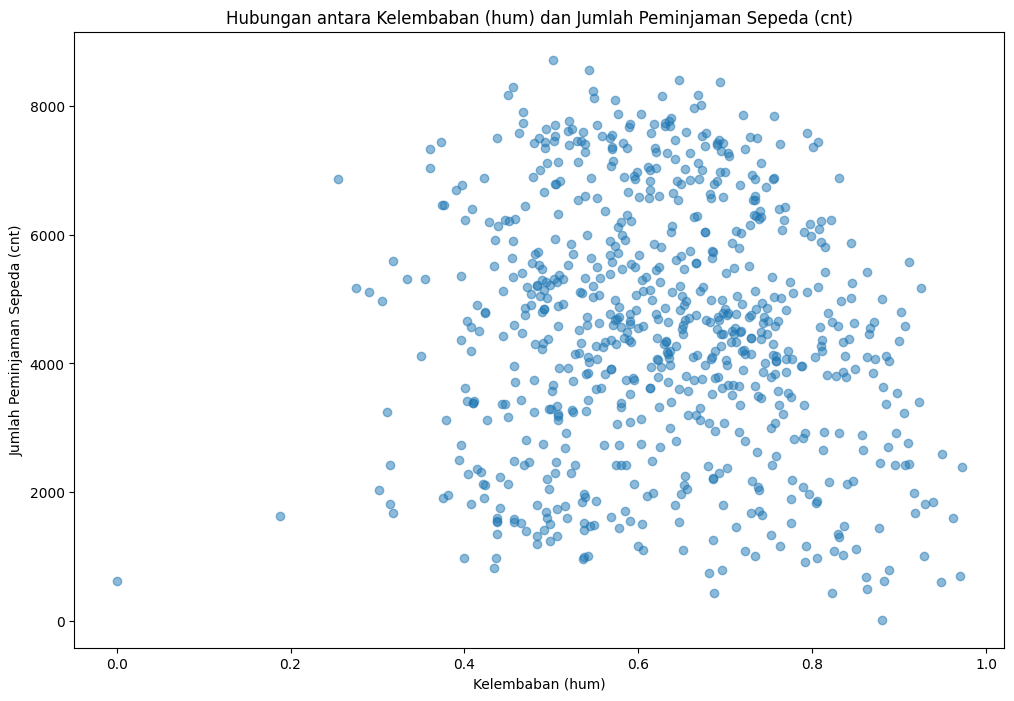

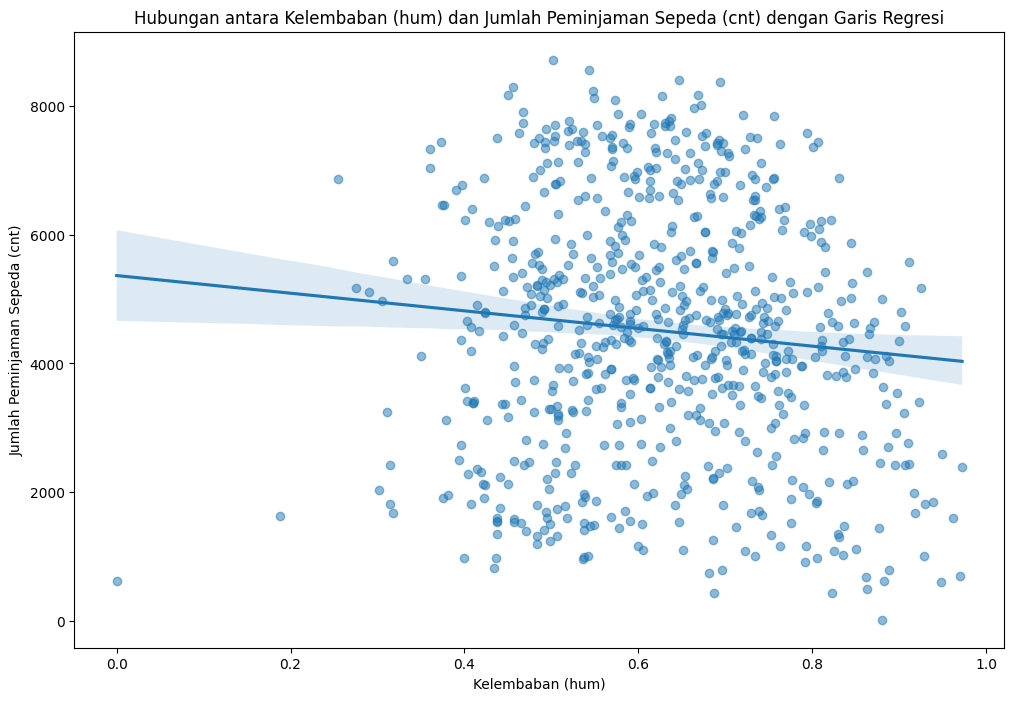

Korelasi antara kelembaban dan jumlah peminjaman sepeda: -0.10


In [9]:
# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_day['hum'], df_day['cnt'], alpha=0.5)
plt.title('Hubungan antara Kelembaban (hum) dan Jumlah Peminjaman Sepeda (cnt)')
plt.xlabel('Kelembaban (hum)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()

plt.figure(figsize=(12, 8))
sns.regplot(x='hum', y='cnt', data=df_day, scatter_kws={'alpha':0.5})
plt.title('Hubungan antara Kelembaban (hum) dan Jumlah Peminjaman Sepeda (cnt) dengan Garis Regresi')
plt.xlabel('Kelembaban (hum)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.show()

# Calculate correlation
correlation = df_day['hum'].corr(df_day['cnt'])
print(f"Korelasi antara kelembaban dan jumlah peminjaman sepeda: {correlation:.2f}")

Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda

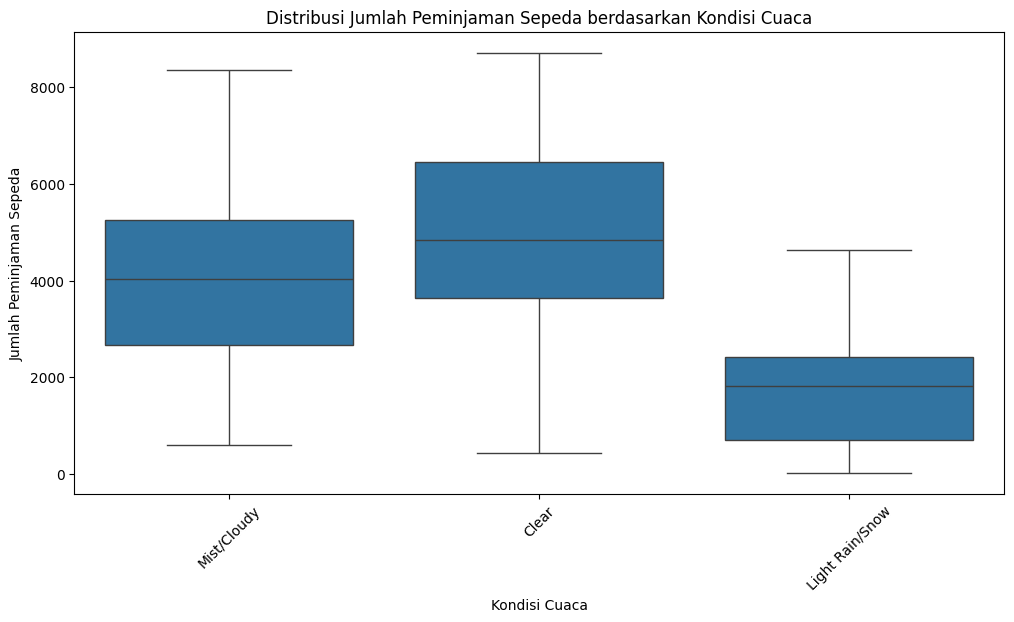

Rata-rata peminjaman sepeda berdasarkan kondisi cuaca:
weather_desc
Clear              4876.786177
Mist/Cloudy        4035.862348
Light Rain/Snow    1803.285714
Name: cnt, dtype: float64


In [10]:
# Simpan salinan numerik dari 'weathersit'
df_day['weathersit_num'] = df_day['weathersit']

# Map weather situations to more descriptive labels
weather_map = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
df_day['weather_desc'] = df_day['weathersit'].map(weather_map)

# Lanjutkan dengan visualisasi boxplot seperti sebelumnya
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_desc', y='cnt', data=df_day)
plt.title('Distribusi Jumlah Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(rotation=45)
plt.show()

# Calculate average rentals for each weather condition
avg_rentals = df_day.groupby('weather_desc')['cnt'].mean().sort_values(ascending=False)
print("Rata-rata peminjaman sepeda berdasarkan kondisi cuaca:")
print(avg_rentals)

Pengaruh Cuaca terhadap Peminjaman Sepeda per Musim

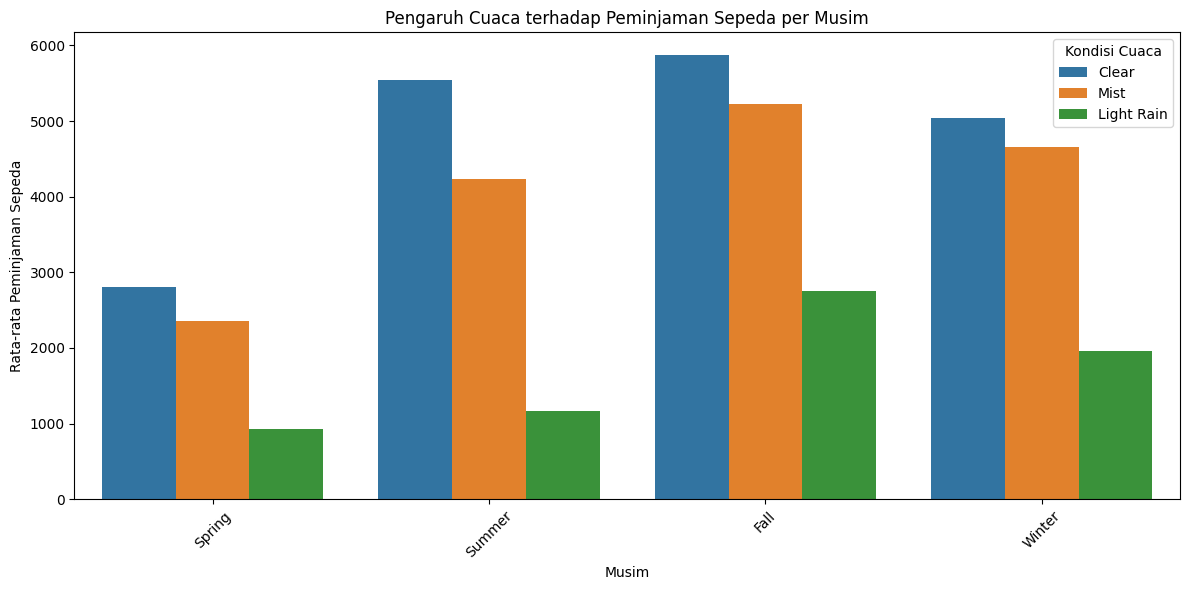

In [11]:
# Analisis interaksi antara cuaca dan musim
season_weather = df_day.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()
season_weather['season'] = season_weather['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
season_weather['weathersit'] = season_weather['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', hue='weathersit', data=season_weather)
plt.title('Pengaruh Cuaca terhadap Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.xticks(rotation=45)
plt.legend(title='Kondisi Cuaca')
plt.tight_layout()
plt.show()

**Insight:**
- Distribusi musim cukup merata
- Mayoritas hari adalah hari kerja
- Cuaca umumnya baik (weathersit 1 dan 2)
- Ada korelasi positif yang kuat antara 'temp' dan 'atemp' dengan 'cnt' (jumlah peminjaman)
- 'Yr' juga memiliki korelasi positif dengan 'cnt', menunjukkan peningkatan peminjaman dari tahun ke tahun

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

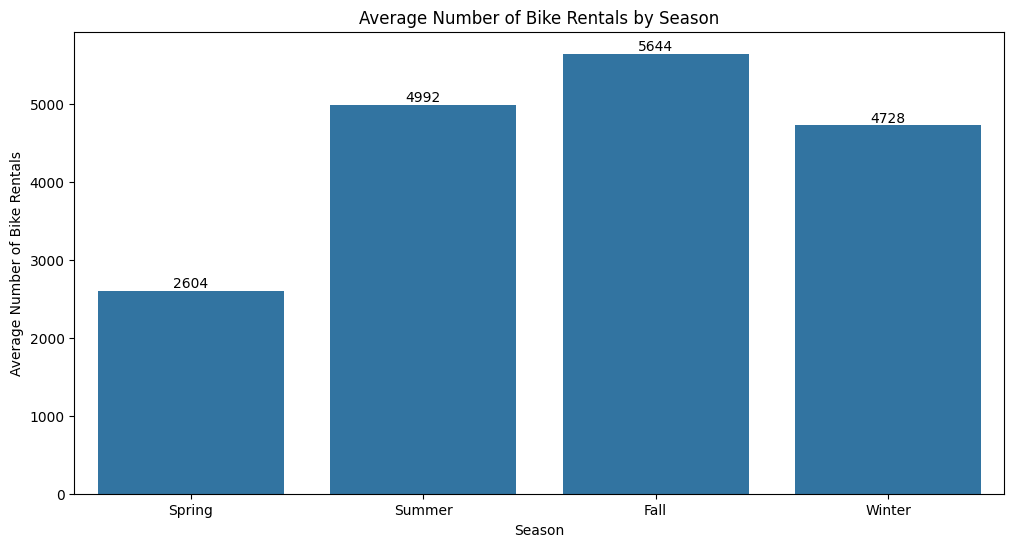

In [12]:
plt.figure(figsize=(12, 6))
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_counts = df_day.groupby('season')['cnt'].mean().reindex([1,2,3,4]).reset_index()
season_counts['Season'] = season_order
sns.barplot(x='Season', y='cnt', data=season_counts, order=season_order)
plt.title('Average Number of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Bike Rentals')

# Add value labels on top of each bar
for i, v in enumerate(season_counts['cnt']):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.show()

### Pertanyaan 2: Apakah ada perbedaan signifikan dalam pola peminjaman sepeda antara hari kerja dan hari libur?

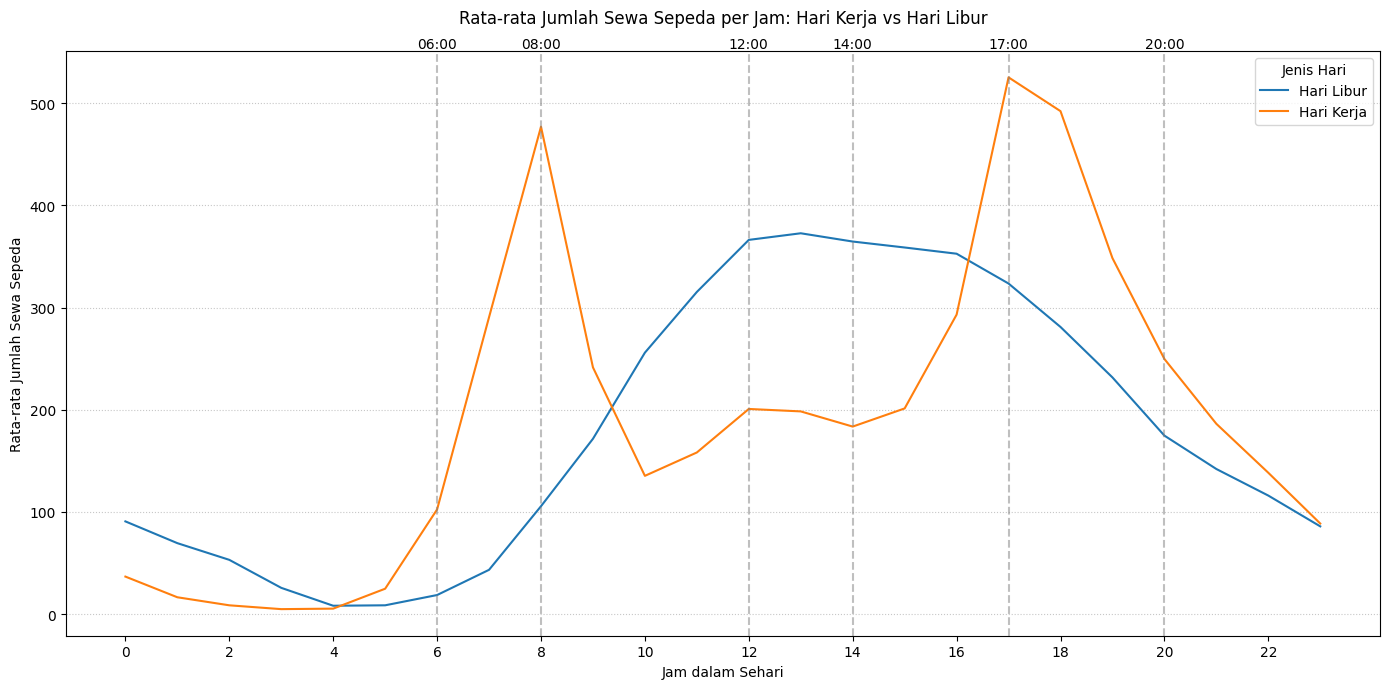

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
workingday_hourly = df_hour.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()
workingday_hourly['is_workingday'] = workingday_hourly['workingday'].map({0: 'Hari Libur', 1: 'Hari Kerja'})

sns.lineplot(x='hr', y='cnt', hue='is_workingday', data=workingday_hourly)
plt.title('Rata-rata Jumlah Sewa Sepeda per Jam: Hari Kerja vs Hari Libur', pad=20)
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.legend(title='Jenis Hari')

# Daftar jam-jam penting
important_hours = [6, 8, 12, 14, 17, 20]

# Menambahkan garis vertikal dan label untuk jam-jam penting
for hour in important_hours:
    plt.axvline(x=hour, color='gray', linestyle='--', alpha=0.5)
    plt.text(hour, plt.ylim()[1], f'{hour:02d}:00', ha='center', va='bottom')

plt.xticks(range(0, 24, 2))  # Menampilkan label jam setiap 2 jam
plt.grid(True, axis='y', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

**Insight:**
- Musim panas dan musim gugur memiliki jumlah peminjaman sepeda tertinggi
- Pola peminjaman sepeda sangat berbeda antara hari kerja dan hari libur
- Pada hari kerja, terdapat dua puncak peminjaman yang jelas (pagi dan sore)
- Pada hari libur, pola peminjaman lebih merata sepanjang hari

## Analisis Lanjutan (Opsional)

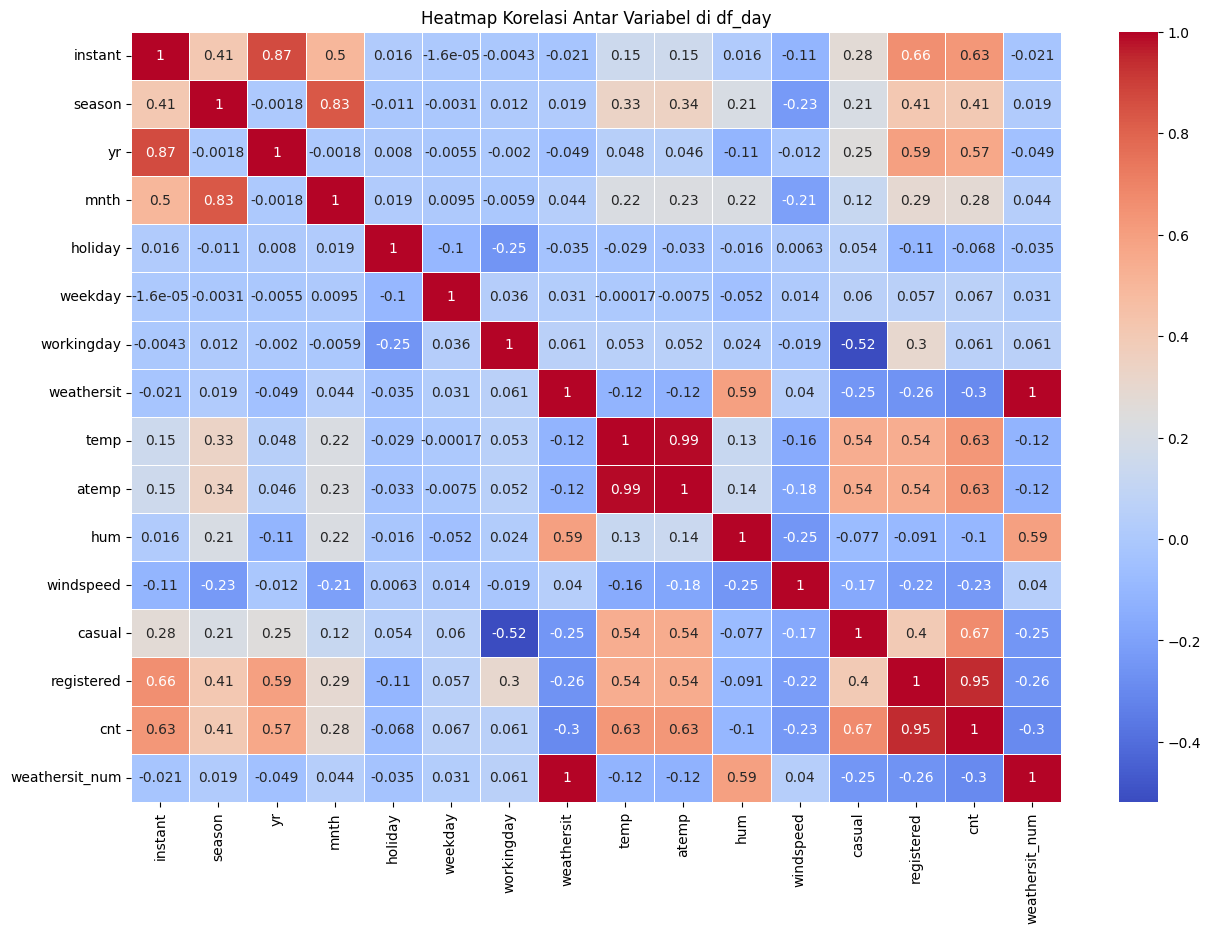

Correlation between temperature and total rentals: 0.63
Correlation between year and total rentals: 0.57
Correlation between weather situation and total rentals: -0.30


In [14]:
# Pilih hanya kolom numerik untuk korelasi
numeric_columns = df_day.select_dtypes(include=[np.number]).columns
corr_day = df_day[numeric_columns].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_day, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel di df_day')
plt.show()

# Print key correlations
print(f"Correlation between temperature and total rentals: {corr_day.loc['temp', 'cnt']:.2f}")
print(f"Correlation between year and total rentals: {corr_day.loc['yr', 'cnt']:.2f}")
print(f"Correlation between weather situation and total rentals: {corr_day.loc['weathersit_num', 'cnt']:.2f}")

## Conclusion

- Pengaruh musim terhadap jumlah peminjaman sepeda:
  - Musim gugur (Fall) memiliki rata-rata peminjaman tertinggi dengan 5644 peminjaman
  - Musim dingin memiliki rata-rata peminjaman terendah.
  - Perbedaan antara musim puncak (gugur) dan musim terendah (dingin) cukup signifikan, menunjukkan pentingnya strategi musiman dalam pengelolaan layanan.

- Perbedaan pola peminjaman sepeda antara hari kerja dan hari libur:
  - Hari kerja menunjukkan dua puncak yang jelas: sekitar pukul 8:00 (berangkat kerja) dan 17:00 (pulang kerja).
  - Hari libur memiliki pola yang lebih merata dengan satu puncak yang lebih lebar di siang hari.
  - Pola ini mengindikasikan bahwa sepeda digunakan terutama untuk commuting pada hari kerja, sementara pada hari libur lebih banyak digunakan untuk rekreasi.

- Analisis korelasi tambahan:
  - Terdapat korelasi positif yang kuat (0.63) antara suhu dan jumlah peminjaman, menunjukkan bahwa cuaca hangat cenderung meningkatkan penggunaan sepeda.
  - Ada korelasi positif (0.57) antara tahun dan jumlah peminjaman, mengindikasikan pertumbuhan popularitas layanan dari tahun ke tahun.
  - Korelasi negatif (-0.3) antara situasi cuaca dan jumlah peminjaman menunjukkan bahwa cuaca buruk cenderung mengurangi penggunaan sepeda.

Rekomendasi bisnis:
1. Tingkatkan ketersediaan sepeda selama musim panas dan musim gugur untuk memenuhi permintaan puncak.
2. Sesuaikan strategi pemasaran dan promosi berdasarkan musim, dengan fokus khusus pada peningkatan penggunaan di musim dingin.
3. Optimalkan alokasi sepeda berdasarkan pola harian, dengan memastikan ketersediaan yang cukup pada jam-jam sibuk hari kerja.
4. Pertimbangkan penawaran paket khusus untuk pengguna reguler yang menggunakan layanan untuk commuting.